In [105]:
# Import required libraries
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain.tools.tavily_search import TavilySearchResults
search=TavilySearchResults()

# Load environment variables from a .env file
load_dotenv()

# Set up API keys (ensure these are stored in your .env file)
openai_api_key = os.getenv("OPENAI_API_KEY")
tavily_api_key = os.getenv("TAVILY_API_KEY")

# Verify that the API keys are loaded
if not openai_api_key or not tavily_api_key:
    raise ValueError("API keys for OpenAI or Tavily are missing. Please check your .env file.")

# Initialize the OpenAI model
llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=openai_api_key,
    temperature=0.7  # Adjust creativity level
)

In [123]:
class CityAttractionTools:
    @tool
    def search_attraction(city: str) -> str:
        """Search the real-time attactions in city using tavily."""
        result = search.invoke(query=f"Top tourist attractions in {city}", max_results=3)
        return "\n".join(doc['content'] for doc in result["results"])
    @tool
    def search_restaurent(city: str) -> str:
        """Search real-time good restuarents in city using tavily."""
        result=search.invoke(query=f"Top restaurents in {city}", max_results=3)
        return "\n".join(doc["content"] for doc in result["results"])
    @tool
    def search_activities(city:str) -> str:
        """Search the activities to do in city for tourists using tavily"""
        result=search.invoke(query=f"different activities for tourists in {city}",max_Results=3)
        return "\n".join(doc["content"] for doc in result["results"])
    @tool
    def search_transportation(city: str) -> str:
        """Search the different travel types available in city using tavily"""
        result=search.invoke(query=f"Public transportation options in {city}",max_results=3)
        return "\n".join(doc['content'] for doc in result["results"])

In [124]:
class WeatherForecast:
    @tool
    def current_weather(city: str) -> str:
        """search real-time weather details using tavily."""
        result = search.invoke(query=f"current weather in {city}", max_results=3)
        return "\n".join(doc['content'] for doc in result["results"])
    @tool
    def weather_forecast(city: str) -> str:
        """Search real-time weather forecasting using tavily."""
        result=search.invoke(query=f"weather forecast in {city}", max_results=3)
        return "\n".join(doc["content"] for doc in result["results"])

In [ ]:
class SearchHotelTools:
    @tool
    def search_hotel(city: str) -> str:
        """Search the hotels in city using tavily."""
        result = search.invoke(query=f"Good hotels to stay for tourists {city}", max_results=3)
        return "\n".join(doc['content'] for doc in result["results"])
    @tool
    def estimate_cost(hotel: str) -> str:
        """give estimation cost of hotel using tavily."""
        result=search.invoke(query=f"Estimation of cost for {hotel} per room", max_results=3)
        return "\n".join(doc["content"] for doc in result["results"])
    @tool
    def budget_range(budget:int) -> str:
        """give the hotels in budget range in city for tourists using tavily"""
        result=search.invoke(query=f"give the top best hotels for tourists in {budget} range",max_Results=3)
        return "\n".join(doc["content"] for doc in result["results"])


In [125]:
class TourBudgetTools:
    @tool
    def add(a:int,b:int) -> int:
        """
        add two integers

        Args:
        a(int): first integer
        b(int): second integer
        returns:
        int : sum of a and b
        """
        return a+b
    @tool
    def multiply(a : int, b: int) -> int:
        """ 
        multiply two integers

        Args:
        a(int) : first integer
        b(int) : second integer
        returns:
        int : product of two numbers
        """
        return a*b
    @tool
    def calculated_total_cost(hotel_cost_per_day: float, days: int, activities_cost: float) -> float:
        """returns total cost of the tour"""
        return hotel_cost_per_day * days + activities_cost
    @tool
    def calculate_daily_budget(total_cost: float, days: int) -> float:
        """ returns howmuch costs per day"""
        if days == 0:
            return 0.0
        return total_cost / days



In [126]:
class CurrencyConversionTools:

    @tool
    def get_exchange_rate(from_currency: str, to_currency: str) -> str:
        """get exchange rate of currency from_currency to to_currency"""
        query = f"Exchange rate {from_currency} to {to_currency}"
        result = search.invoke(query=query, max_results=1)
        return result["results"][0]["content"]

    @tool
    def convert_currency(amount: float, from_currency: str, to_currency: str) -> str:
        """ Convert current currency to expected currency"""

        query = f"{amount} {from_currency} to {to_currency}"
        result = search.invoke(query=query, max_results=1)
        content = result["results"][0]["content"]
        return f"Currency conversion result: {content}"


In [127]:
class ItineraryTools:

    @tool
    def get_day_plan(city: str, day_number: int) -> str:
        """ Give Tour plan day-wise"""
        result = search.invoke(query=f"Day {day_number} travel plan in {city}", max_results=1)
        return result["results"][0]["content"]

    @tool
    def create_full_itinerary(city: str, days: int) -> str:
        "give travel itinery plann"
        itinerary = []
        for day in range(1, days + 1):
            day_plan = search.invoke(query=f"Day {day} travel itinerary in {city}", max_results=1)
            itinerary.append(f"Day {day}: {day_plan['results'][0]['content']}")
        return "\n".join(itinerary)


In [128]:
@tool
def search_internet(query: str) -> str:
    """Search from tavily"""
    result = search.invoke(query=query, max_results=3)
    return "\n".join([doc["content"] for doc in result["results"]])

@tool
def search_hotels(city: str) -> str:
    """Search good hotels using tavily"""
    result = search.invoke(query=f"Top rated hotels in {city} 2025", max_results=3)
    return "\n".join([doc["content"] for doc in result["results"]])

@tool
def get_weather(city: str) -> str:
    """Search good weather using tavily"""
    result = search.invoke(query=f"Current weather in {city}", max_results=1)
    return result["results"][0]["content"]

In [129]:

tools=[CityAttractionTools.search_attraction,
           CityAttractionTools.search_restaurent,
           CityAttractionTools.search_activities,
           CityAttractionTools.search_transportation,WeatherForecast.current_weather,
           WeatherForecast.weather_forecast,SearchHotelTools.search_hotel,
           SearchHotelTools.estimate_cost,
           SearchHotelTools.budget_range,TourBudgetTools.add,
           TourBudgetTools.multiply,
           TourBudgetTools.calculated_total_cost,
           TourBudgetTools.calculate_daily_budget,CurrencyConversionTools.get_exchange_rate,
           CurrencyConversionTools.convert_currency,ItineraryTools.get_day_plan,
           ItineraryTools.create_full_itinerary]


In [130]:
llm_with_tools=llm.bind_tools(tools)

In [131]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [132]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using tavily, give best place to tour and give complete day wise plan to set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [133]:
builder=StateGraph(MessagesState)
builder.add_node("llm_decision_step",function_1)

In [118]:
tools

[StructuredTool(name='search_attraction', description='Search the real-time attactions in city using tavily.', args_schema=<class 'langchain_core.utils.pydantic.search_attraction'>, func=<function CityAttractionTools.search_attraction at 0x000001BAFA2BEB60>),
 StructuredTool(name='search_restaurent', description='Search real-time good restuarents in city using tavily.', args_schema=<class 'langchain_core.utils.pydantic.search_restaurent'>, func=<function CityAttractionTools.search_restaurent at 0x000001BAFA2BF1A0>),
 StructuredTool(name='search_activities', description='Search the activities to do in city for tourists using tavily', args_schema=<class 'langchain_core.utils.pydantic.search_activities'>, func=<function CityAttractionTools.search_activities at 0x000001BAFA2BEA20>),
 StructuredTool(name='search_transportation', description='Search the different travel types available in city using tavily', args_schema=<class 'langchain_core.utils.pydantic.search_transportation'>, func=<fun

In [134]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"llm_decision_step")

In [135]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

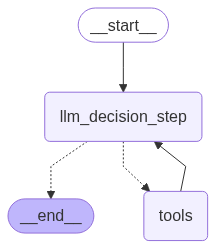

In [121]:
builder.add_edge("tools","llm_decision_step")

react_graph=builder.compile()
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [136]:
message=[HumanMessage(content="What is best place to travel in USA with 10 lakh inr in 5 days?")]

In [137]:
response=react_graph.invoke({"messages":message})
response["messages"][-1].content

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [84]:
from langchain_core.pydantic_v1 import BaseModel
class TravelState(BaseModel):
    destination: str
    days: int
    from_currency: str = "USD"
    to_currency: str = "EUR"
    research: str = ""
    weather: str = ""
    hotels: str = ""
    total_cost: float = 0.0
    currency_converted: str = ""
    itinerary: str = ""
    summary: str = ""



In [85]:
def city_info_node(state: TravelState):
    result = destination_researcher.run(f"Provide travel information about {state.destination}")
    return {"research": result}

def weather_node(state: TravelState):
    result = weather_agent.run(state.destination)
    return {"weather": result}

def hotels_node(state: TravelState):
    result = hotel_agent.run(state.destination)
    return {"hotels": result}
def cost_node(state: TravelState):
    try:
        # Get dynamic hotel cost
        hotel_cost = hotel_agent.run({
            "city": state.destination,
            "tool": "SearchHotelTools.estimate_cost"
        })

        # You can optionally extract or compute activities cost (here, a rough fixed value or via separate tool)
        activities_cost = destination_researcher.run({
            "city": state.destination,
            "tool": "CityAttractionTools.search_activities"
        })
        # You can define logic to estimate a number, or leave it to the agent
        estimated_activities_cost = 200.0  # Placeholder if activity result is descriptive text

        # Total trip cost
        total_cost = currency_agent.run({
            "hotel_cost_per_day": float(hotel_cost),
            "days": state.days,
            "activities_cost": estimated_activities_cost,
            "tool": "TourBudgetTools.calculated_total_cost"
        })

        return {"total_cost": float(total_cost)}

    except Exception as e:
        return {"total_cost": 0.0, "error": f"Failed to calculate cost: {str(e)}"}
def currency_node(state: TravelState):
    result = currency_agent.run({
        "amount": state.total_cost,
        "from_currency": state.from_currency,
        "to_currency": state.to_currency
    })
    return {"currency_converted": result}


In [86]:
def itinerary_node(state: TravelState):
    result = itinerary_agent.run({
        "city": state.destination,
        "days": state.days
    })
    return {"itinerary": result}

def trip_summary_node(state: TravelState):
    summary = f"""
Trip Summary for {state.destination} ({state.days} days):

Destination Research:
{state.research}

Weather:
{state.weather}

Hotels:
{state.hotels}

Estimated Total Cost: ${state.total_cost:.2f} USD  
Converted Currency: {state.currency_converted}

Itinerary:
{state.itinerary}
"""
    return {"summary": summary}


In [87]:
from langgraph.graph import StateGraph, END
graph = StateGraph(TravelState)
graph.add_node("CityInfo", city_info_node)
graph.add_node("Weather", weather_node)
graph.add_node("Hotels", hotels_node)
graph.add_node("Costs", cost_node)
graph.add_node("Currency", currency_node)
graph.add_node("Itinerary", itinerary_node)
graph.add_node("Summary", trip_summary_node)

graph.set_entry_point("CityInfo")
graph.add_edge("CityInfo", "Weather")
graph.add_edge("Weather", "Hotels")
graph.add_edge("Hotels", "Costs")
graph.add_edge("Costs", "Currency")
graph.add_edge("Currency", "Itinerary")
graph.add_edge("Itinerary", "Summary")
graph.set_finish_point("Summary")

app = graph.compile()


In [90]:

result = app.invoke("query" :{
    "destination": "Barcelona",
    "days": 5,
    "from_currency": "USD",
    "to_currency": "INR"
})

print("\nFinal Travel Summary:\n", result["summary"])

SyntaxError: invalid syntax (2599835819.py, line 1)